In [1]:
import pandas as pd
df=pd.read_csv('starbucks.csv')
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1006 non-null   object 
 1   Close   1006 non-null   float64
 2   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.7+ KB


In [3]:
df=pd.read_csv('starbucks.csv',parse_dates=['Date'])
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1006 non-null   datetime64[ns]
 1   Close   1006 non-null   float64       
 2   Volume  1006 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.7 KB


In [5]:
df=pd.read_csv('starbucks.csv',parse_dates=True,index_col='Date')
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [6]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [7]:
df=df.drop(columns='Volume')

In [8]:
df.head()

,Close
Date,
2015-01-02,38.0061
2015-01-05,37.2781
2015-01-06,36.9748
2015-01-07,37.8848
2015-01-08,38.4961


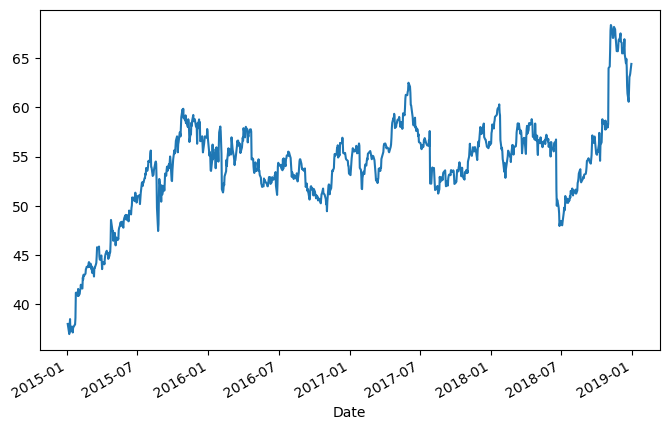

In [9]:
df.Close.plot(figsize=(8,5));

<Axes: xlabel='Date'>

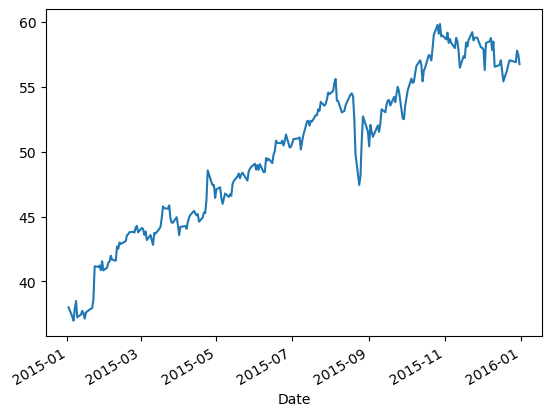

In [10]:
df.loc['2015'].Close.plot()

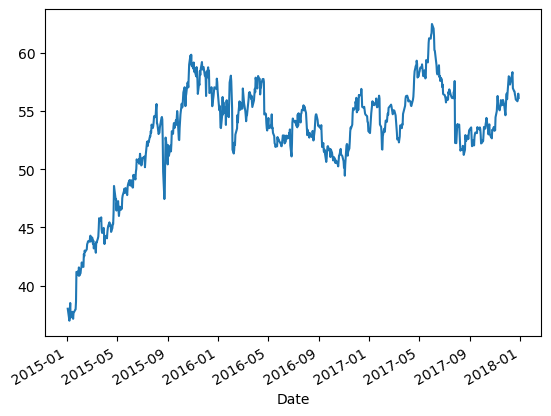

In [11]:
df.loc['2015':'2017'].Close.plot();

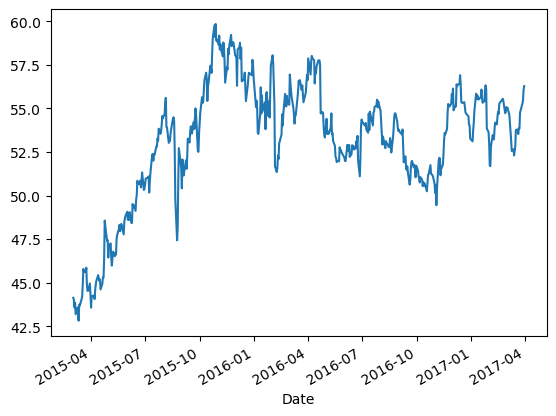

In [12]:
df.loc['2015-03':'2017-03'].Close.plot();


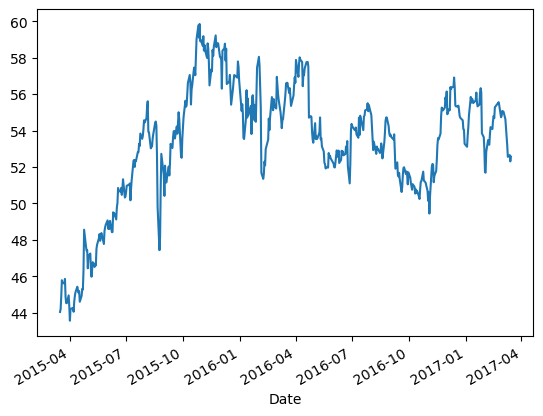

In [13]:
df.loc['2015-03-15':'2017-03-15'].Close.plot();

In [14]:
df.loc['2015'].mean()

Close    50.0781
dtype: float64

In [15]:
df.loc['2016'].mean()

Close    53.891732
dtype: float64

In [16]:
df.loc['2017'].mean()

Close    55.45731
dtype: float64

In [17]:
df['d1']=df['Close'].diff()

In [18]:
df.head()

,Close,d1
Date,,
2015-01-02,38.0061,NaN
2015-01-05,37.2781,-0.7280
2015-01-06,36.9748,-0.3033
2015-01-07,37.8848,0.9100
2015-01-08,38.4961,0.6113


In [23]:
round(df.loc['2015'].d1.mean(),2)

0.07

In [24]:
round(df.loc['2016'].d1.mean(),2)

-0.01

In [25]:
round(df.loc['2017'].d1.mean(),2)

0.01

In [26]:
df['d2']=df['d1'].diff()

In [27]:
df.head()

,Close,d1,d2
Date,,,
2015-01-02,38.0061,NaN,NaN
2015-01-05,37.2781,-0.7280,NaN
2015-01-06,36.9748,-0.3033,0.4247
2015-01-07,37.8848,0.9100,1.2133
2015-01-08,38.4961,0.6113,-0.2987


In [29]:
round(df.loc['2015'].d2.mean(),2)

-0.0

In [33]:
round(df.loc['2016'].d2.mean(),2)

-0.0

In [35]:
round(df.loc['2017'].d2.mean(),2)

0.0

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
x=seasonal_decompose(df.Close)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [38]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [39]:
df.index.freq='D'

ValueError: Inferred frequency None from passed values does not conform to passed frequency D

In [51]:
df=df.asfreq('D')

In [52]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-11',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1460, freq='D')

In [53]:
x=seasonal_decompose(df.Close)

ValueError: This function does not handle missing values

In [54]:
df.head()

,Close,d1,d2
Date,,,
2015-01-02,38.0061,NaN,NaN
2015-01-03,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN
2015-01-05,37.2781,-0.7280,NaN
2015-01-06,36.9748,-0.3033,0.4247


In [55]:
df.tail()

,Close,d1,d2
Date,,,
2018-12-27,63.20,0.12,-2.40
2018-12-28,63.39,0.19,0.07
2018-12-29,NaN,NaN,NaN
2018-12-30,NaN,NaN,NaN
2018-12-31,64.40,1.01,0.82


In [56]:
df=df.ffill()

In [57]:
x=seasonal_decompose(df.Close)

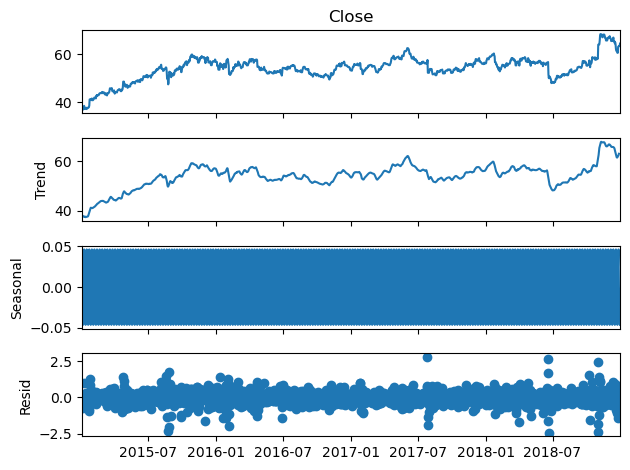

In [58]:
x.plot();

In [59]:
x=seasonal_decompose(df['2015':'2016'].Close)

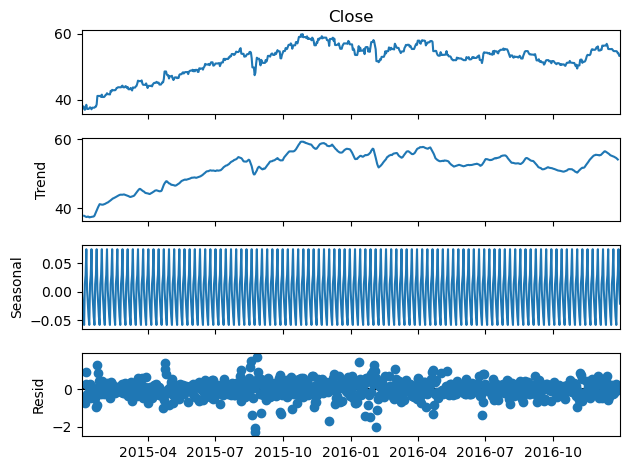

In [60]:
x.plot();

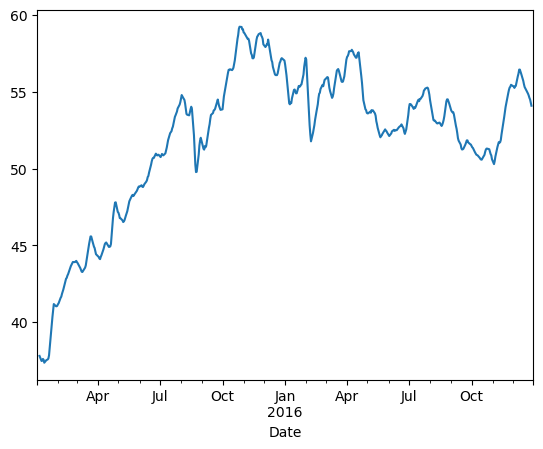

In [61]:
x.trend.plot();

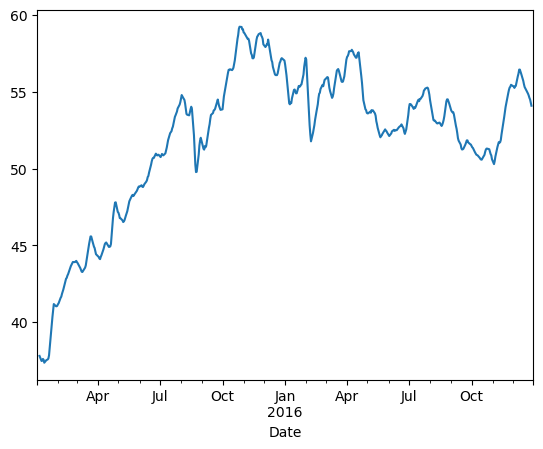

In [62]:
x.trend.plot();

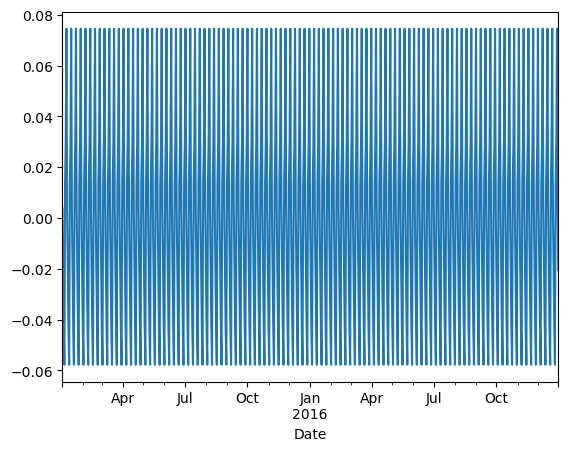

In [63]:
x.seasonal.plot();

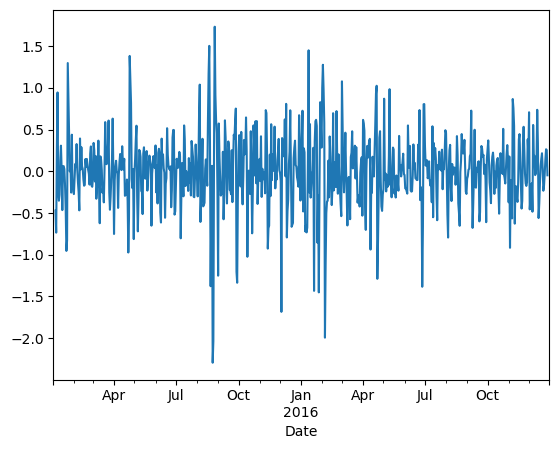

In [64]:
x.resid.plot();

In [67]:
df1=pd.DataFrame(df.Close)

In [68]:
df1['d1']=df1.Close.diff()

In [69]:
df1['d2']=df1.d1.diff()

In [70]:
df1.dropna(inplace=True)

In [71]:
df1.head()

,Close,d1,d2
Date,,,
2015-01-04,38.0061,0.0000,0.0000
2015-01-05,37.2781,-0.7280,-0.7280
2015-01-06,36.9748,-0.3033,0.4247
2015-01-07,37.8848,0.9100,1.2133
2015-01-08,38.4961,0.6113,-0.2987


In [72]:
x=seasonal_decompose(df1['2015':'2016'].d1)

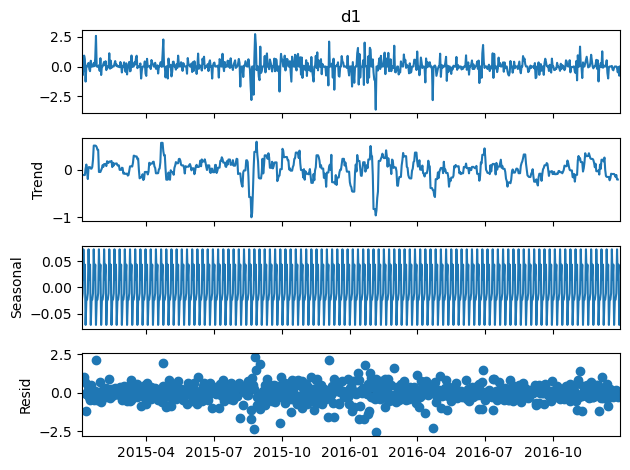

In [73]:
x.plot();

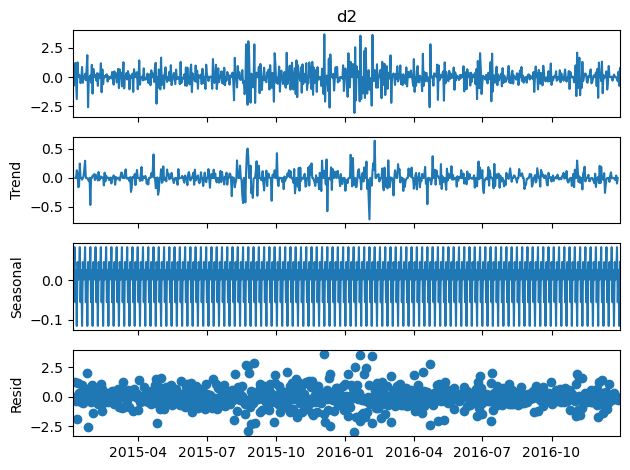

In [74]:
y=seasonal_decompose(df1['2015':'2016'].d2)
y.plot();